In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, kstest

In [2]:
def poisson_process(lambda_1, max_time):
    time = 0
    events = [0]
    times = [0]
    
    while True:
        u = np.random.uniform()
        time += -np.log(u) / lambda_1
        
        if time > max_time:
            times.append(max_time)
            events.append(events[-1])
            break
        
        if int(time) == times[-1]:
            events[-1] = events[-1] + 1
        else:
            times.append(int(time))            
            events.append(events[-1] + 1)
        
    return times, events

In [3]:
lambda_1 = 1
max_times = [1, 20, 90]
N = 10**4

Statistic: 0.37445888234288466


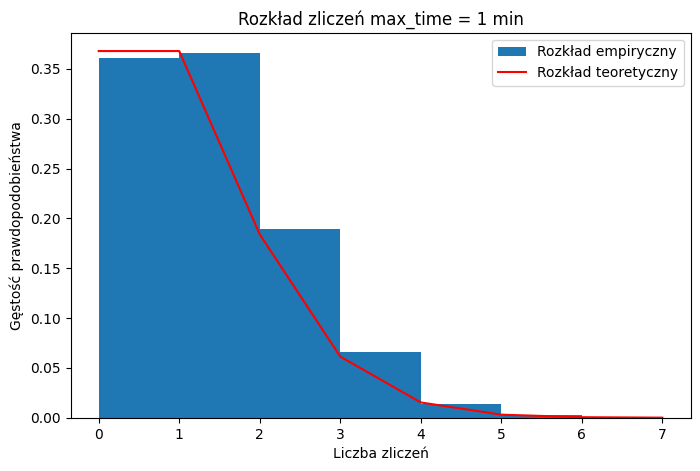

Statistic: 0.08969258423132515


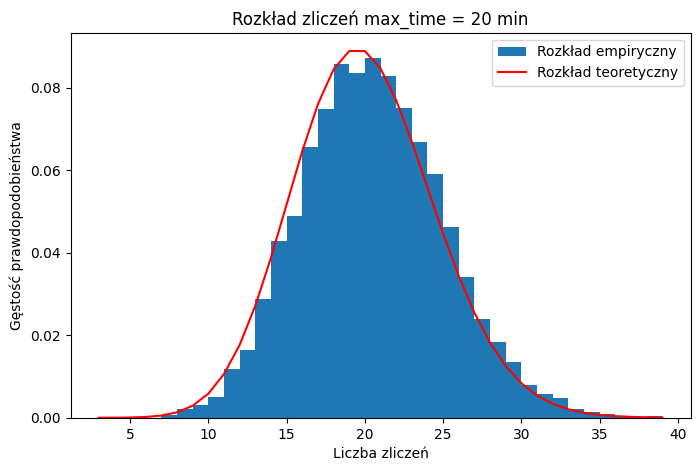

Statistic: 0.036281753325125454


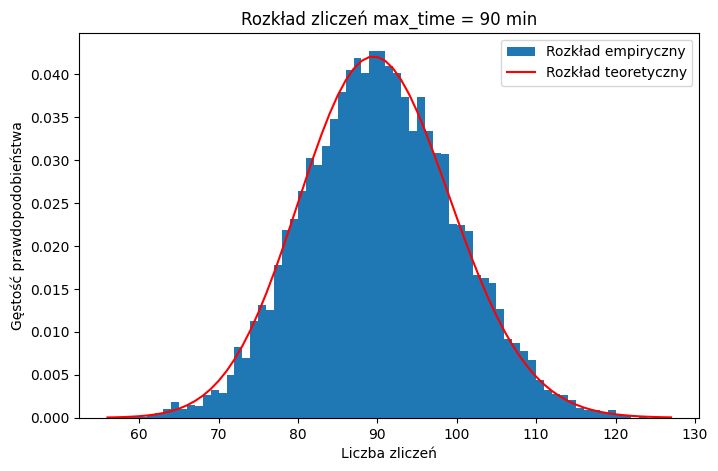

In [4]:
histograms = []

for max_time in max_times:
    histogram = []
    for _ in range(N):
        times, events = poisson_process(lambda_1, max_time)
        histogram.append(events[-1])
    histograms.append(histogram)

for i in range(len(max_times)):
    max_time = max_times[i]
    histogram = histograms[i]
    
    plt.figure(figsize=(8, 5))
    _, bins, _ = plt.hist(histogram, bins=range(min(histogram), max(histogram) + 1), density=True, label='Rozkład empiryczny')
    plt.plot(bins, poisson.pmf(bins, lambda_1 * max_time), c='r', label='Rozkład teoretyczny')
    
    ks_stat, _ = kstest(histogram, poisson(lambda_1 * max_time).cdf)
    print(f'Statistic: {ks_stat}')

    plt.title(f'Rozkład zliczeń max_time = {max_time} min')
    plt.xlabel('Liczba zliczeń')
    plt.ylabel('Gęstość prawdopodobieństwa')
    plt.legend()
    plt.show()

Statystyka mierzy maksymalną różnicę pomiędzy dystrybuantą empiryczną a dystrybuantą teoretyczną. Im mniejsze różnica tym lepsze odwzorowanie.